# **CHAPTER 05. 회귀(regression)**

## **01. 회귀 소개**

회귀 분석은 유전적 특성을 연구하던 영국의 통계학자 갈톤(Galton)이 수행한 연구에서 유래했다는 것이 일반론이다. 부모와 자식 간의 키의 상관관계를 분석했던 갈톤은 부모의 키가 모두 클 때 자식의 키가 크긴 하지만 그렇다고 부모를 능가할 정도로 크지 않았고, 부모의 키가 모두 아주 작을 때 그 자식의 키가 작기는 하지만 부모보다는 큰 경향을 발견했다. 부모의 키가 아주 크더라도 자식의 키가 부모보다 더 커서 세대를 이어가면서 무한정 커지는 것은 아니며, 부모의 키가 아주 작더라도 자식의 키가 부모보다 더 작아서 세대를 이어가며 무한정 작아지는 것은 아니다. 즉, 사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙이 있다. **회귀 분석은 이처럼 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.**

회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다. 예를 들어 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지 모델링하고 예측하는 것이다.
$$Y=W_{1}*X_{1}+W_{2}*X_{2}+...+W_{n}*X_{n}$$
* $Y$ : 종속변수, 결정 값
* $X$ : 독립변수, 피처
* $W$ : 회귀 계수(Regression coefficient)

**머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.**

회귀는 회귀 계수의 선형/비선형, 독립변수 개수, 종속변수 개수에 따라 여러 가지 유형으로 나눌 수 있다.
* 회귀 계수 선형/비선형 : 선형 회귀/비선형 회귀
* 독립변수의 개수 한 개/여러 개 : 단일 회귀/다중 회귀

지도학습은 분류와 회귀로 나뉜다. 분류는 예측값이 카테고리와 같은 이산형(categorical) 클래스 값이고, 회귀는 연속형 숫자 값이다.

선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것을 말한다.
* 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
* 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.
* 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 추가한 회귀 모델이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.
* 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
* 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 회귀라는 이름이 붙어있지만, 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 최소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.

## **02. 단순 선형 회귀를 통한 회귀 이해**

단순 선형 회귀는 독립변수, 종속변수가 하나인 선형 회귀이다.

예를 들어, 주택 가격이 주택의 크기로만 결정된다고 하자. 일반적으로 주택의 크기가 크면 가격이 높아지는 경향이 있기 때문에 주택 가격은 주택 크기에 대해 선형(직선 형태)의 관계로 표현할 수 있다. $X$축이 주택의 크기 축(평당 크기)이고 $Y$축이 주택의 가격 축인 2차원 평면에서 주택 가격은 1차 함수식으로 모델링할 수 있다. 단순 선형 회귀의 기울기와 절편(intercept)을 회귀 계수로 지칭한다. 실제 주택 가격은 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값이 된다($w_{0}+w_{1}*X+오류값$).

실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다. 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미이다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다. 오류 값은 +, - 모두 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더하게 되면 오류 합이 줄어들 수 있다. 따라서 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구한다.

RSS는 변수가 $w_{0}, w_{1}$인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 $w_{0}, w_{1}$(회귀 계수)를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀식의 독립변수 $X$, 종속변수 $Y$가 중심 변수가 아니라 $w$ 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주한다). 일반적으로 RSS는 학습 데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현된다.
$$RSS(w)=\frac{1}{N}(편차제곱의합)$$

회귀에서 RSS는 비용(Cost)이며, w 변수(회귀 계수)로 구성되는 RSS를 비용 함수/손실 함수(loss function)라고 한다. 머신 러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다.

## **03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

$w$ 파라미터의 개수가 적다면 방정식으로 비용 함수가 최소가 되는 $w$ 변숫값을 도출할 수 있겠지만, $w$ 파라미터가 많으면 방정식을 동원하더라도 해결하기 어렵다.

경사 하강법은 이러한 고차원 방정식에 대한 문제를 해결해주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식이다. 경사 하강법은 '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나이다. 경사 하강법의 사전적 의미인 '점진적 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 $w$ 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 $w$ 파라미터를 구한다.

경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 $w$ 파라미터를 지속해서 보정해나간다. 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 $w$ 값을 계속 업데이트해나간다. 그리고 오류 값이 더이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 $w$ 값을 최적 파라미터로 반환한다.

예를 들어 비용 함수가 2차 함수라면 경사 하강법은 최초인 $w$에서부터 미분한 뒤 이 미분 값이 감소하는 방향으로 $w$를 업데이트한다. 도함수의 기울기가 감소하지 않는 지점(기울기=0)을 비용 함수가 최소인 지점으로 간주하고 그때의 $w$를 반환한다.

$R(w)$가 두 개의 파라미터 $w_{0}, w_{1}$을 가지고 있기 때문에 일반적인 미분을 적용할 수 없고, 각 변수에 편미분을 적용해야 한다. 업데이트는 새로운 $w_{1}$을 이전 $w_{1}$에서 편미분 결괏값을 마이너스(-)하면서 적용한다. 즉, 새로운 $w_{1}$는 $w_{1}-(w_{1} 편미분 값)$이다. 편미분 값이 너무 클 수 있기 때문에 보정 계수를 곱하는데, 이를 '학습률'이라고 한다. 이를 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다.

**경사 하강법의 일반적인 프로세스**
* Step 1 : $w_{0}, w_{1}$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.
* Step 2 : $w_{0}, w_{1}$을 업데이트한 후 다시 비용 함수의 값을 계산한다.
* Step 3 : 비용 함수의 값이 감소했으면 다시 Step 2를 반복한다. 더이상 비용 함수의 값이 감소하지 않으면 그때의 $w_{0}, w_{1}$를 구하고 반복을 중지한다.

**예제**

간단한 회귀식인 $y=4X+6$을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀 계수 $w_{0}, w_{1}$를 도출해보자.

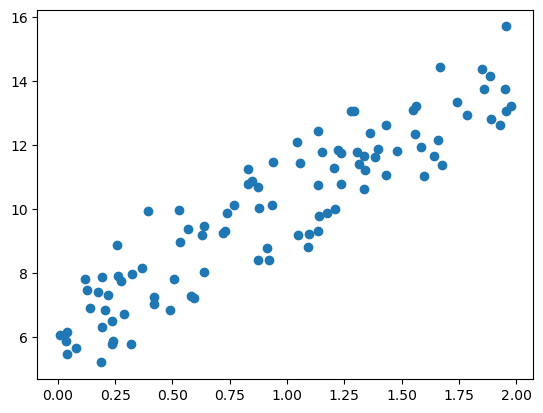

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X=2*np.random.rand(100, 1) ## 0~1 난수 100x1 matrix
y=6+4*X+np.random.randn(100, 1) ## 표준정규분포 난수 100x1 matrix

# X, y 데이터 세트 시각화
plt.scatter(X, y)

데이터는 y=4X+6을 중심으로 무작위로 퍼져 있다. 다음으로 비용 함수를 정의해보자.

비용 함수 ```get_cost()```는 실제 y 값과 예측된 y 값을 인자로 받아서 RSS를 계산한다.

In [2]:
def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

이제 경사 하강법을 ```gradient_descent()```이라는 함수를 생성해 구현한다. ```gradient_descent()```는 $w_{0}, w_{1}$을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 $w_{0}, w_{1}$을 업데이트한다. ```gradient_descent()```는 위에서 무작위로 생성한 X와 y를 입력받는데, X와 y 모두 넘파이 ndarray이다.

```get_weight_update()``` 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 ```np.dot(X, w1.T)+w0```으로 구한다.
* ```np.dot(X, w1.T)``` : X, w1의 내적 곱

100개의 데이터가 있다면 예측값은 $w_{0}+X_{1}*w_{1}+X_{2}*w_{1}+...+X_{100}*w_{1}$이며, 입력 배열 X와 w1 배열의 내적과 동일하다. 따라서 넘파이의 내적 연산인 ```dot()```을 이용해 예측 배열값을 계산한다. 또한 w1_update, w0_update로 $(보정 계수)*(편미분값)$을 넘파이의 dot 행렬 연산으로 계산한 뒤 이를 반환한다.

In [3]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    
    # w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    
    # 예측 배열을 계산하고 예측과 실제 값의 차이 계산
    y_pred=np.dot(X, w1.T)+w0
    diff=y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

```get_weight_updates()```을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수인 ```gradient_descent_steps()``` 함수를 생성한다.

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    
    # w0와 w1을 모두 0으로 초기화
    w0=np.zeros((1, 1))
    w1=np.zeros((1, 1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1, w0

```gradient_descent_steps()```를 호출해 w1과 w0을 구해보자. 그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 ```get_cost()``` 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해보자.

In [5]:
w1, w0=gradient_descent_steps(X, y, iters=1000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred=w1[0, 0]*X+w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


실제 선형식인 y=4X+6과 유사하게 w1은 4.022, w0는 6.162가 도출되었다. 예측 오류 비용은 약 0.9935이다.

앞에서 구한 y_pred에 기반해 회귀선을 그려본다.

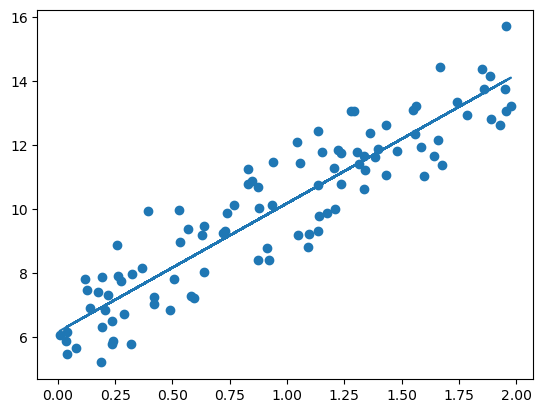

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있다. 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다. 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다.

**확률적 경사 하강법은 전체 입력 데이터로 $w$가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 업데이트되는 값을 계산하므로 경사 하강법에 비해 속도가 빠르다.** 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다. (미니 배치) 확률적 경사 하강법을 ```stochastic_gradient_descent_steps()``` 함수로 구현한다. 이 함수는 앞에서 생성한 ```gradient_descent_steps()```와 비슷하다. 다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0=np.zeros((1, 1))
    w1=np.zeros((1, 1))
    prev_cost=100000
    iter_index=0
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y를 저장
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1, w0

```stochastic_gradient_descent_steps()```을 이용해 w1, w0 및 예측 오류 비용을 계산한다.

In [8]:
w1, w0=stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 :', round(w1[0, 0], 3), 'w0 :', round(w0[0, 0], 3))
y_pred=w1[0, 0]*X+w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.028 w0 : 6.156
Stochastic Gradient Descent Total Cost : 0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과와 경사 하강법으로 구한 w1, w0는 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금 높을 뿐, 큰 예측 성능 상의 차이가 없다. 따라서 큰 데이터를 처리할 경우에 사용한다.

지금까지는 피처가 1개, 즉 독립변수가 1개인 단순 선형 회귀에서 경사 하강법을 적용해보았다. 피처가 여러 개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있다.

데이터의 개수가 N이고 피처 M개의 입력 행렬을 X, 회귀 계수를 W 배열로 표기하면 예측 행렬 ```np.dot(X, W.T)+w0```로 구할 수 있다.

$w_{0}$을 Weight의 배열인 W 안에 포함시키기 위해서 X의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat 0을 추가한다.

## **04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다. 이 중 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 LinearRegression을 이용해 보스턴 주택 가격 예측 회귀를 구현한다.

**LinearRegression 클래스 - Ordinary Least Squares**

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다. LinearRegression 클래스는 ```fit()``` 메서드로 X, y 배열을 입력받으면 회귀 계수(Coefficient)인 W를 coef_ 속성에 저장한다.

```class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)```

**입력 파라미터**
* fit_intercept : 불린 값으로, 디폴트는 True이다. intercept(절편) 값을 계산할 것인지 말지를 결정한다. False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.
* normalize : 불린 값으로, 디폴트는 False이다. fit_intercept가 False인 경우, 이 파라미터가 무시된다. True로 지정하면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.

**속성**
* coef_ : ```fit()``` 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
* intercept_ : intercept 값

OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 높은 경우 분산이 커져 오류에 민감해진다. 이러한 현상을 다중 공선성(multi-collinearity) 문제라고 한다.

일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 다수의 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소도 고려해볼 수 있다.

**회귀 평가 지표**

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다. 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여 오류가 상쇄된다. 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.

* MAE : Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것이다.
* MSE : Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것이다.
* RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)이다.
* $R^2$ : 분산 기반으로 예측 성능을 평가한다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.

이 밖에 MSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSE에 로그를 적용한 RMSLE(Root Mean Squared Log Error)도 있다.

사이킷런에서는 RMSE를 제공하지 않는다. RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 한다.

각 평가 방법에 대한 사이킷런의 API 및 cross_val_score이나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값은 다음과 같다.

**평가 방법 - 사이킷런 평가 지표 API**
* MAE : metrics.mean_absolute_error
* MSE : metrics.mean_squared_error
* $R^2$ : metrics.r2_score

**평가 방법 - Scoring 함수 적용 값**
* MAE : 'neg_mean_absolute_error'
* MSE : 'neg_mean_squared_error'
* $R^2$ : 'r2'

**cross_val_score, GridSearchCV와 같은 Scoring 함수에 회귀 평가 지표를 적용할 때 주의할 점**

예를 들어 MAE의 scoring 파라미터 값을 살펴보면 'neg_mean_absolute_error'와 같이 'neg_'라는 접두어가 붙어 있다. 이는 Negative(음수) 값을 가진다는 의미인데, MAE는 절댓값의 합이기 때문에 음수가 될 수 없다. Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다(특히 GridSearchCV의 경우 가장 좋은 Evaluation 값을 가지는 하이퍼 파라미터로 Estimator 학습까지 자동으로 시킬 수 있다). 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요하다. 원래의 평가 지표 값에 -를 곱해 음수(Negative)로 만들어 작은 오류 값이 더 큰 숫자로 인식되게 한다. ```metrics.mean_absolute_error()```와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환한다. 하지만 Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 ```-1*metrics.mean_absolute_error()```이니 주의가 필요하다.

**LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

**보스턴 주택 가격 데이터 피처 설명**

* CRIM : 지역별 범죄 발생률
* ZN : 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우 1, 아니면 0)
* NOX : 일산화질소 농도
* RM : 거주할 수 있는 방 개수
* AGE : 1940년 이전에 건축된 소유 주택의 비율
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러 당 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유의 주택 가격(중앙값)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# boston 데이터 세트 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


데이터 세트 피처의 Null 값은 없으며 모두 float형이다. ```bostomDF.info()```로 확인할 수 있다.

각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해보자. 'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'의 총 8개 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다. 시본(Seaborn)의 ```regplot()``` API는 X,Y 축 값의 산점도와 함께 선형 회귀 직선을 그린다. ```matplotlib.subplot()```를 이용해 각 ax마다 칼럼과 PRICE의 관계를 표현한다.

matplotlib의 ```subplot()```은 여러 개의 그래프를 한 번에 표현하기 위해 사용된다. 인자로 입력되는 ncols는 열 방향으로 위치할 그래프의 개수이며, nrows는 행 방향으로 위치할 그래프의 개수이다. ncols=4, nrows=2이면 2개의 행과 4개의 열을 가진 총 8개의 그래프를 행, 열 방향으로 그릴 수 있다.

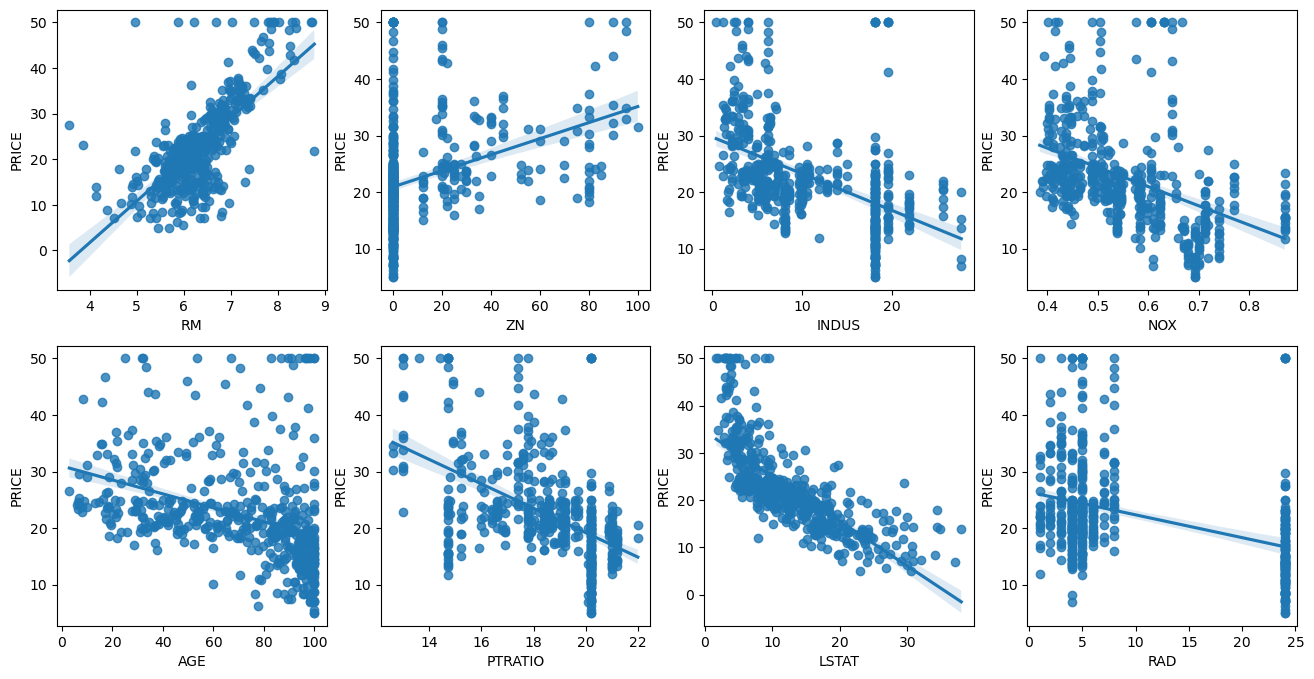

In [10]:
# 2개의 행과 4개의 열을 가진 subolots를 이용. axs는 4x2개의 ax를 가짐
fig, axs=plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features=['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4) ## 정수부분
    col=i%4 ## 나머지
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러진다. RM(방 개수)의 양 방향의 선형성(Positive Linearity)가 가장 크다. 즉, 방의 크기가 클수록 가격이 증가한다. LSTAT(하위 계층의 비율)는 음의 방향의 선형성(Negative Linearity)이 가장 두드러지게 나타난다. LSTAT이 작을수록 PRICE가 증가한다.

LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만든다. ```train_test_split()```을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행한다. 그리고 metrics 모듈의 ```mean_squared_error()```과 ```r2_score()``` API를 이용해 MSE와 R2 Score 값을 구한다.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


LinearRegression으로 생성한 주택가격 모델의 intercept(절편)와 coefficient(회귀 계수) 값을 구해보자.

In [12]:
print('절편 값 :', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 : 40.99559517216419
회귀 계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해보자. 이를 위해 판다스 Series의 ```sort_values()``` 함수를 이용한다.

In [13]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의한다.
coeff=pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보인다. 최적화를 수행하면서 피처 coefficients의 변화를 살펴보자.

5개의 폴드 세트에서 ```cross_val_score()```를 이용해 교차 검증으로 MSE와 RMSE를 측정해보자. 사이킷런은 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환한다. ```cross_val_score()```의 인자로 ```scoring='neg_mean_squared_error'```를 지정하면 반환되는 수치 값은 음수 값이다. 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데 반해, 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이다. 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해 ```scoring='neg_mean_squared_error'```로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환한다. 따라서 ```cross_val_score()```에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값이 된다. 이렇게 다시 변환된 MSE 값에 넘파이의 ```sqrt()``` 함수를 적용해 RMSE를 구할 수 있다.

In [14]:
from sklearn.model_selection import cross_val_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구한다.
neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_sqaured_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


5개의 폴드 세트에 대해 교차 검증을 수행한 결과, 평균 RMSE는 약 5.829가 나왔다. ```cross_val_score(scoring='neg_mean_squared_error')```로 반환된 값을 확인해보면 모두 음수임을 알 수 있다.

## **05. 다항 회귀와 과(대)적합/과소적합 이해**

**다항 회귀 이해**

회귀가 독립변수의 단항식이 아닌 고차방정식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다. 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀이다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 하지만 다항 회귀 또한 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.

사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환한다. PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다른 전처리 변환 클래스와 마찬가지로 PolynomialFeatures 클래스는 ```fit(), transform()``` 메서드를 통해 이 같은 변환 작업을 수행한다.

**예제**

PolynomialFeatures를 이용해 단항값 $[x_{1}, x_{2}]$을 2차 다항값 $[1, x_{1}, x_{2}, {x_{1}}^2, x_{1}x_{2}, {x_{1}}^2]$으로 변환해보자.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환할 다항식 생성. [[0, 1], [2, 3]]의 2x2 행렬 생성
X=np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처 :\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처를 2차 다항 계수로 변경하므로 첫 번째 입력 단항 계수 피처 $[x_{1}=0, x_{2}=1]$은 $[1, x_{1}=0, x_{2}=1, {x_{1}}^2=0, x_{1}x_{2}=0, {x_{1}}^2=0]$로 변환된다. 마찬가지로 두 번째 입력 단항 계수 피처 $[x_{1}=2, x_{2}=3]$은 $[1, x_{1}=2, x_{2}=3, {x_{1}}^2=4, x_{1}x_{2}=6, {x_{1}}^2=9]$로 변환된다. 이렇게 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀를 구현한다.

다음으로 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도해 보자. 이를 위해 3차 다항 회귀 함수를 임의로 설정하고 회귀 계수를 예측한다.

**예시**

3차 다항 회귀의 결정 함수식은 $y=1+2x_{1}+3{x_{1}}^2+4{x_{2}}^3$으로 설정하고 이를 위한 함수 polynomial_func()를 만든다. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다.

In [16]:
def polynomial_func(X):
    y=1+2*X[:, 0]+3*X[:, 0]**2+4*X[:, 1]**3
    return y

X=np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature :\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값 :\n', y)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [  5 125]


이제 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. ```PolynomialFeatures(degree=3)```은 단항 계수 피처 $[x_{1}, x_{2}]$를 3차 다항 계수 $[1, x_{1}, x_{2}, {x_{1}}^2, x_{1}x_{2}, {x_{2}}^2, {x_{1}}^3, {x_{1}}^2x_{2}, x_{1}{x_{2}}^2, {x_{1}}^3]$과 같이 10개의 다항 계수로 변환한다.

In [17]:
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature :\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다. 원래 다항식 $y=1+2x_{1}+3{x_{1}}^2+4{x_{2}}^3$의 계수 값과는 차이가 있지만 다항 회귀로 근사한다. 이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.

바로 이전 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법이다.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y=1+2*X[:, 0]+3*X[:, 0]**2+4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model=Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])
X=np.arange(4).reshape(2, 2)
y=polynomial_func(X)
model=model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 과하게 학습 데이터에만 맞춘 학습이 이뤄져 오히려 테스트 데이터 환경에서 예측 정확도가 떨어진다. 즉, 차수가 높아질수록 과적합 문제가 발생한다.

**예제**

원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosine) 그래프 관계를 가지도록 만들어준다. 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다.

학습 데이터는 30개의 임의의 데이터인 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성된다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다.
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값이다.
y=true_fun(X)+np.random.randn(n_samples)*0.1

이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교한다. 다항식 차수별로 학습을 수행한 뒤 ```cross_val_score()```로 MSE 값을 구해 차수별 예측 성능을 평가한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보자.


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.40772896250986845입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.043208749872317626입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08]입니다.
Degree 15 MSE는 182493841.77304456입니다.


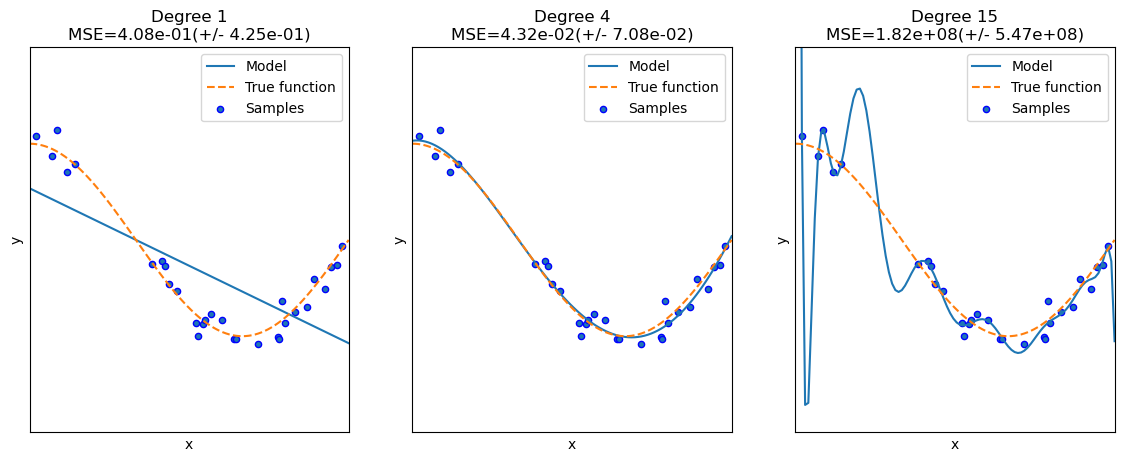

In [20]:
plt.figure(figsize=(14, 5))
degrees=[1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)):
    ax=plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree 별로 Polynomial 변환한다.
    polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([('polynomial_features', polynomial_features), 
                       ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가한다.
    scores=cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0부터 1까지 테스트 데이터 세트를 100개로 나누어 예측을 수행한다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.
    X_test=np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x');plt.ylabel('y');plt.xlim((0, 1));plt.ylim((-2, 2));plt.legend(loc='best')
    plt.title('Degree {}\nMSE={:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다. 학습 데이터는 0부터 1 사이의 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성했으며 MSE(Mean Squared Error) 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다.
* Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해보인다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다. MSE 값은 약 0.407이다.
* Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지 예측까지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타내고 있다.
* 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 약 182493841.773이 될 정도로 어처구니 없는 오류 값이 발생한다. 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 높은 MSE 값이 나왔다.

좋은 예측 모델은 과소적합 모델, 과적합 모델이 아닌 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미한다.

**편향-분산 트레이드오프(Bias-Variance Trade off)**

앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. 이런 모델을 고편향(High Bias)성을 가졌다고 표현한다. 반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 고분산(High Variance)성을 가졌다고 한다.

* 저편향/저분산(Low Bias/Low Variance) : 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼있는 아주 뛰어난 성능을 보여준다.
* 저편향/고분산(Low Bias/High Variance) : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포돼있다.
* 고편향/저분산(High Bias/Low Variance) : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼있다.
* 고편향/고분산(High Bias/High Variance) : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포돼있다.

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합). 편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.

높은 편향/낮은 분산에서 과소적합되기 쉬우며, 낮은 편향/높은 분산에서 과적합되기 쉽다. 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.